<a href="https://colab.research.google.com/github/kaispace30098/CustomerService_QC_report/blob/main/GoWise_QC_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

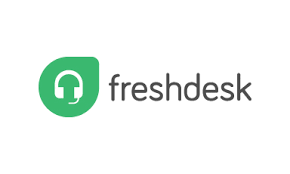

#**Ming's Mark Quality Control Weekly Report**


####1. Please make sure old sheet is deleted and new sheet is pasted to the google doc(Freshdesk Raw Data): 
https://docs.google.com/spreadsheets/d/1NjWFYhEpKPhnWsL22ZIJ4gpNkbBlCGk6E-pYHVOkCuc/edit#gid=1480829085

####2. Press "Run first!" button to Connect to the Google Sheet, it will ask you to get the Authorization Code from the Google account.

---



In [1]:
#@title Run first!
import numpy as np
import pandas as pd
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
wb= gc.open_by_url('https://docs.google.com/spreadsheets/d/1NjWFYhEpKPhnWsL22ZIJ4gpNkbBlCGk6E-pYHVOkCuc/edit#gid=1480829085')
sheet = wb.worksheet('Freshdesk Raw Data')
data = sheet.get_all_values()
df0=pd.DataFrame(data)
df0.columns = df0.iloc[0]
df0 = df0.iloc[1:]
#Store the column information into numpy array tag
tag_col=df0['Tags'].str.lower()
a=tag_col.to_numpy()
tag=a.astype(str)
#create an array to store all the situations 
##YOU CAN UPDATE THE SITUATION
cond_list=np.array(['constant blink and beep','constant flickering','constant flickering','cooking takes too long','cosmetic damage','damaged prong','defective control panel','defective fan','defective power cord','defective power button','defective preset light','defective time button','defective temp button','defective temp control','displays partial numbers','e1 ','e2','e3','light stays on','heating issue','melted prongs','no beeping','door damage','no power','not cooking properly','power cord damaged','power cord melted','short circuit','timer counts down rapidly','timer not counting down','turns itself on','turns off during cycle','888 on screen','accessory damaged','accessory rusting','af blow up','af fire','af gets too hot','af melt','af oven broken handle','af oven fire','af oven gets too hot','af oven handle warped','af oven light defective','af oven light turns off','af oven melt','af oven smoke','af oven temp inaccuracy','af oven unit damaged','af oven unit leaking','af smoke','af unit damaged','af unit dent & scratched','af unit interior rusting','af unit leaking','basket damaged','basket dented','basket not flush in unit','basket nub damaged','basket peeling','basket rusting','basket scratched','basket sharp rim','basket stuck in pan','broken handle (due to handle detachment)',"cage won't fit",'control panel peeling','countertop damaged','crisper tray damaged','crisper tray peeling','crisper tray scratched','crisper tray rusting','crisper tray warped','crooked racks','defective light button','defective threading',"defective time dial","divider damaged","doesn't power off",'door hinge broken','door loose',"door won't close","door won't open","door won't power","door won't stay on unit",'drip pan damaged','drip pan peeling','drip pan scratched','fan loose','fan noise','fan works when off','fogged up display','glass door damaged','grill tray peeling','grill tray scratched','handle button broke','handle button stuck','handle damaged (not from handle detachment)','handle detachment','handle detach updated','handle discolored','handle rusting','heating element damaged','high pitch noise','hot power cord','in celsius','interior unit scratched','loose handle','loose heating element','loose screws','mesh rack damaged','mesh rack peeling','mesh tray damaged','mesh tray not fitting','mesh tray rusting','missing rotisserie rod','no temp num display','no time/temp display','oven door damaged','oven rack damaged','pan cover damaged','pan cover discolored','pan damaged','pan leaking','pan hard to close','pan hard to open','pan not flush in unit','pan peeling','pan rusting','pan scratched',"pan won't activate power",'pause during cycle','power trigger damaged','power when opened',"racks won't fit",'rattling inside unit','roasting tray peeling',"rod won't fit",'rotisserie cage damaged','rotisserie cage unlatch','rotisserie clicking','rotisserie not spinning','rotisserie holder out','runs w/o pan','shallow mesh basket rust','sharp screw','sharp thumb bolt','smell','steak cage too short',"steak cage won't fit",'steam leaking','stuff in glass door','thumb bolt stuck','ticking noise','too much heat','trips breaker','wire rack not fitting',"won't close when hot","won't open",'baking pan damaged','baking pan peeling','baking pan rusting','baking pan scratched','clamp tongs damaged','kabob rack damaged','pizza pan damaged','pizza pan peeling','pizza pan scratched','standard rack damaged',"can't cancel cycle",'condensation in display','damaged lid','damaged lid handle','defective lid','e4','floater valve blocked','heating element flaking','hole in pot','knob damaged','lid handle loose',"lid won't close",'metal plate damaged','metal plate rust','pc base handle loose','pc blow up','pc fire','pc gets too hot','pc melt','pc oven light defective',"pc oven won't open",'pc pressure too high','pc unit damaged','pot damaged','pot peeling','pot scratched','pressure button fell out','pressure button issue','sealing ring damaged','steam from floater valve','steam from knob','steam from lid','steam from lid handle',"timer doesn't display",'whistling noise',"won't pressurize","won't release pressure",'sg handle missing','blender issues','beep and crack noise','blades broken','blades rusted','blender base damaged','blender loose seal ring','blender noise','brown liquid','mold/moisture pitcher','particles in drinks','pitcher leaking','slides during cycle','arm cuff not inflating','inaccurate reading','body scale damaged','incorrect measurement','no bia measurement','scale screen defective','flashlight damaged','defective inverter','fault mode','inverter damaged','inverter fire','low ac output','low power output','low voltage output','no ac output','no power output','output voltage unstable','red light protect mode','remote damaged','remote defective','smoke','buzzing noise','base damaged','defective led','defective led leaves','defective led trunk','led car plug damaged','led car plug defective','led damaged','led faded','lens damaged','chair damaged','chair handle damaged','chair hinge unlocks','chair - storage bag ripped','mat damaged','mat faded','mat size incorrect','mat stain',"mat won't lie flat",'reversed','defective adapter','outlet blocked','outlet damaged'])
#define two empty array to store the condition and models
cond=np.array([])
sku=np.array([])
for j in range(len(cond_list)):
    for i in range(len(tag)):
        if cond_list[j] in tag[i].astype(str): 
            #print(cond_list[j],tag[i].split(' ')[0])
            cond=np.append(cond,cond_list[j])
            sku=np.append(sku,tag[i].split(' ')[0])
sku=np.core.defchararray.upper(sku)
#from Numpy to Pandas
column1=['General condition']
df_test1 = pd.DataFrame(cond,columns=column1)

column2=['SKU']
df_test2 = pd.DataFrame(sku,columns=column2)

df = pd.concat([df_test1, df_test2], axis=1)

#Generate the results

#####   General Conditions

In [ ]:
#@title Run
#SQL: group by 1. Condition , 2. Sku, count by descending order
df1=df.groupby(['General condition','SKU']).size().to_frame('size')
g1 = df1['size'].groupby(level=0, group_keys=False)
pd.set_option('display.max_rows', None)
g1_1=g1.nlargest(10)
display(g1_1)

##### SKUs

In [ ]:
#@title Run
#SQL: group by SKU, General Condition, count by descending order
df2=df.groupby(['SKU','General condition']).size().to_frame('size')
g2 = df2['size'].groupby(level=0, group_keys=False)
g2.nlargest(10)
pd.set_option('display.max_rows', None)
#pd.set_printoptions(max_columns=500)
display(g2.nlargest(10))

#####Agent breakdown

In [ ]:
#@title Run
agent_count=df0.groupby(['Agent']).size()
agent_count

#####Freshdesk Type Breakdown

In [ ]:
#@title Run
case_count=df0.groupby(['Type']).size()
case_count

## Download the sheet for Pivot Table

In [ ]:
#@title Get the Table
df3=df[['General condition','SKU']]
df3['count']=1
from google.colab import files
df3.to_csv('filename.csv') 
files.download('filename.csv')